In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
file_path='../eil51-tsp.txt'
cities = []
with open(file_path, 'r') as file:
    for line in file:
        city_info = line.strip().split()
        city_info = [int(info) for info in city_info]
        cities.append(city_info)

In [4]:
for city in cities:
    print(city)

[1, 37, 52]
[2, 49, 49]
[3, 52, 64]
[4, 20, 26]
[5, 40, 30]
[6, 21, 47]
[7, 17, 63]
[8, 31, 62]
[9, 52, 33]
[10, 51, 21]
[11, 42, 41]
[12, 31, 32]
[13, 5, 25]
[14, 12, 42]
[15, 36, 16]
[16, 52, 41]
[17, 27, 23]
[18, 17, 33]
[19, 13, 13]
[20, 57, 58]
[21, 62, 42]
[22, 42, 57]
[23, 16, 57]
[24, 8, 52]
[25, 7, 38]
[26, 27, 68]
[27, 30, 48]
[28, 43, 67]
[29, 58, 48]
[30, 58, 27]
[31, 37, 69]
[32, 38, 46]
[33, 46, 10]
[34, 61, 33]
[35, 62, 63]
[36, 63, 69]
[37, 32, 22]
[38, 45, 35]
[39, 59, 15]
[40, 5, 6]
[41, 10, 17]
[42, 21, 10]
[43, 5, 64]
[44, 30, 15]
[45, 39, 10]
[46, 32, 39]
[47, 25, 32]
[48, 25, 55]
[49, 48, 28]
[50, 56, 37]
[51, 30, 40]


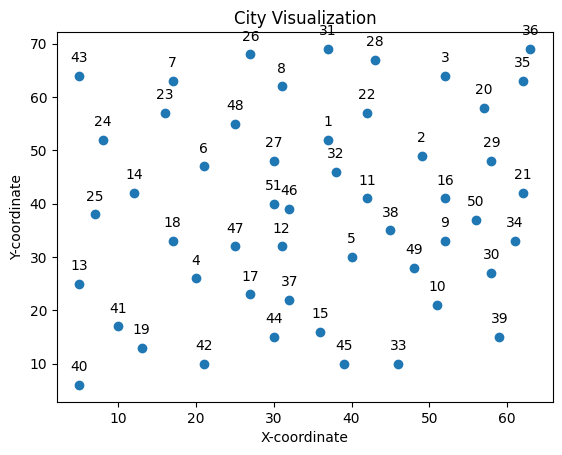

In [5]:
# 提取坐标数据
x = [city[1] for city in cities]
y = [city[2] for city in cities]

# 绘制散点图
plt.scatter(x, y)

# 添加城市编号标签
for city in cities:
    plt.annotate(city[0], (city[1], city[2]), textcoords="offset points", xytext=(0,10), ha='center')

# 设置图形标题和坐标轴标签
plt.title("City Visualization")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")

# 显示图形
plt.show()

In [6]:
#种群初始化
import random 
import math 
import copy
from pprint import pprint


#传入种群大小,初始化种群
def init_population(population_size):
    population=[]
    #二维列表，每一行为一个染色体，即路径方案
    for i in range(population_size):
        #单个染色体
        chromosome=[]
        while chromosome.__len__()!=51:
            #随机选取一个城市，需要是未被选取过的
            rand=random.randint(0,50)
            if rand not in chromosome:
                chromosome.append(rand)
            else:
                continue
        population.append(copy.deepcopy(chromosome))
        #print(population)
        #chromosome.sort()
        #print(chromosome)
        chromosome.clear()
    return population

#初始化种群
# population_size=20
# population=init_population(population_size)
# print(population)


In [7]:
#任意两城市间距离distance作为代价，距离之和的倒数即为适应度
def distance_func(cities):
    distance=[[0 for x in range(51)] for y in range(51)]
    x = [city[1] for city in cities]
    y = [city[2] for city in cities]
    for i in range(51):
        for j in range(51):
            distance[i][j]=math.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
    return distance
distance=distance_func(cities)

In [14]:
#个体适应度计算,将最小化目标函数转换为最大化目标函数，即对总距离取倒数
def fitness_func(choromosome):
    fitness=0
    for i in range(51):
        if i!=50:
            start=choromosome[i]
            end=choromosome[i+1]
            fitness+=distance[start][end]
        else :
            start=choromosome[i]
            end=choromosome[0]
            fitness+=distance[start][end]    
    return 1000/fitness

# fitness=fitness_func(population[0])
# fitness
#计算所有个体的适应度
def fitness_all(population):
    fitness=[]
    for i in range(population_size):
        tmp=fitness_func(population[i])
        fitness.append(copy.deepcopy(tmp))
    return fitness

In [16]:
# fitness=fitness_all(population)
# fitness

[0.6926099449954148,
 0.5898216173755544,
 0.5887950014865622,
 0.6682819845883698,
 0.5659266919437167,
 0.6269664079645376,
 0.586646669525898,
 0.6322656289325607,
 0.6159232698745407,
 0.618361477219923,
 0.5846593731483657,
 0.5999375937258162,
 0.5731721604517526,
 0.6432365304035226,
 0.568507498604225,
 0.6839044631232041,
 0.6607938115389279,
 0.6055012328410819,
 0.6138431990742778,
 0.5892063223108328]

In [9]:
#计算平均适应度，用于绘图
def fitness_average():
    #计算所有个体的适应度
    fitness=[]
    for i in range(population_size):
        tmp=fitness_func(population[i])
        fitness.append(copy.deepcopy(tmp))
    fitness_aver=sum(fitness)/len(fitness)
    return fitness_aver
# fitness_aver=fitness_average()
# fitness_aver

In [10]:
#采用轮盘赌方法产生新的种群
def select_func(fitness):
    #计算各个个体被选中的累计概率
    new_population=[]
    fit_sum=sum(fitness)
    possibility=[value/fit_sum for value in fitness]
    possibility=np.cumsum(possibility)
    for i in range(population_size):
        #产生一个0到1之间的随机数，依据随机数出现在上述哪个概率区域内来确定各个个体被选中的次数,将被选中的个体加入新的种群中
        rand=random.random()
        for j in range(population_size):
            if rand>possibility[j]:
                continue
            else:
                new_population.append(copy.deepcopy(population[j]))
                break
    return new_population

# new_population=select_func(fitness)
# new_population


In [11]:
#交叉重组
#c_rate交叉概率
#num_node交叉基因数
#采用基于位置的交叉，在样本1中随机选择交换基因，根据交叉部分生成新的样本1，再将样本2中未被选择到的基因按顺序复制到样本1中
def crossover(population, c_rate, num_node):
    cross_time = math.floor(len(population) * c_rate)
    for i in range(cross_time):
        # 在种群中随机选取两个个体
        random_chromosome1_index = random.randint(0, len(population) - 1)
        random_chromosome2_index = random.randint(0, len(population) - 1)

        # print(random_chromosome1_index, random_chromosome2_index)

        # 确保两个个体不同
        while random_chromosome1_index == random_chromosome2_index:
            random_chromosome2_index = random.randint(0, len(population) - 1)
        random_chromosome1 = copy.deepcopy(population[random_chromosome1_index])
        random_chromosome2 = copy.deepcopy(population[random_chromosome2_index])

        random_chromosome1_backup = copy.deepcopy(random_chromosome1)
        random_chromosome2_backup = copy.deepcopy(random_chromosome2)
        
        # print(random_chromosome1_backup,random_chromosome2_backup)
        # 随机选取num_node个基因进行重组
        index_gene = random.sample(range(len(random_chromosome1)), num_node)
        
        # print(index_gene)
        # 样本一中选择保留的基因,已经存在的基因
        retain1=[]
        for gene in index_gene:
            random_chromosome1[gene] = random_chromosome1_backup[gene]
            retain1.append(random_chromosome1[gene])

        # print(retain1)

        #样本二中与样本一中保留基因不同的按顺序复制
        for gene1 in range(len(random_chromosome1)):
            if gene1 not in index_gene:
                for gene2 in range(len(random_chromosome1)):
                    if random_chromosome2_backup[gene2] not in retain1:
                        random_chromosome1[gene1] = random_chromosome2_backup[gene2]
                        # print("fuzhi",random_chromosome1)
                        retain1.append(random_chromosome1[gene1])
                        break
            else:
                continue
        # print(retain1)
        # print(random_chromosome1)
        # 对样本2进行同样的操作
        retain2=[]
        for gene in index_gene:
            random_chromosome2[gene] = random_chromosome2_backup[gene]
            retain2.append(random_chromosome2[gene])

        # print(retain2)

        for gene1 in range(len(random_chromosome1)):
            if gene1 not in index_gene:
                for gene2 in range(len(random_chromosome1)):
                    if random_chromosome1_backup[gene2] not in retain2:
                        random_chromosome2[gene1] = random_chromosome1_backup[gene2]
                        # print("fuzhi",random_chromosome2)
                        retain2.append(random_chromosome2[gene1])
                        break
            else:
                continue
        # print(retain2)
        # print(random_chromosome2) 
        # print("***",random_chromosome1,"***",random_chromosome2)
        # 更新种群中的个体
        population[random_chromosome1_index] = random_chromosome1
        population[random_chromosome2_index] = random_chromosome2

    return population

# 示例用法
# population_size = 4
# population = [[0, 1, 2, 3, 4, 5], [5,4,3,2,1,0], [2,3,1,5,4,0], [3,5,1,2,4,0]]

# crossover(population, 0.8, 3)
# print(population)

In [12]:
#变异m_rate:变异率，m_rate*population即需要变异的染色体数量
#每次在个体基因序列中选择两个基因的位置进行交换
def mutation(population, m_rate):
    mutation_time = math.floor(len(population) * m_rate)
    # print(mutation_time)
    # 随机抽取染色体
    chromosome_index = random.sample(range(len(population)), mutation_time)
    # print(chromosome_index)

    for index in chromosome_index:
        gene1 = random.randint(0, len(population[0]) - 1)
        gene2 = random.randint(0, len(population[0]) - 1)
        # print(gene1,gene2)
        tmp = population[index][gene1]
        population[index][gene1] = population[index][gene2]
        population[index][gene2] = tmp
    return population

# 示例用法
# population = [[0, 1, 2, 3, 4, 5], [5, 4, 3, 2, 1, 0], [2, 3, 1, 5, 4, 0], [3, 5, 1, 2, 4, 0]]
# m_rate = 0.25
# mutated_population = mutation(population, m_rate)
# print(mutated_population)

第 0 次迭代： 0.6054153190852497
第 1 次迭代： 0.6063525364089213
第 2 次迭代： 0.6089746387322601
第 3 次迭代： 0.6118884794251893
第 4 次迭代： 0.614235290370417
第 5 次迭代： 0.6141451201422197
第 6 次迭代： 0.6166248323389734
第 7 次迭代： 0.6174392581158771
第 8 次迭代： 0.6156899480269159
第 9 次迭代： 0.6150440400214936
第 10 次迭代： 0.6176702221451146
第 11 次迭代： 0.6179947402418182
第 12 次迭代： 0.6208086878492992
第 13 次迭代： 0.6228811954750877
第 14 次迭代： 0.6261625509452259
第 15 次迭代： 0.6264949842398412
第 16 次迭代： 0.6285776130597339
第 17 次迭代： 0.6293307324328852
第 18 次迭代： 0.6311581793298472
第 19 次迭代： 0.6336623275610771
第 20 次迭代： 0.6381842781846135
第 21 次迭代： 0.6367969710422341
第 22 次迭代： 0.6392465182708554
第 23 次迭代： 0.6428231829581484
第 24 次迭代： 0.6462292693882209
第 25 次迭代： 0.6442520197644609
第 26 次迭代： 0.6438885165464121
第 27 次迭代： 0.644782714650296
第 28 次迭代： 0.6473677453382517
第 29 次迭代： 0.6495357983848689
第 30 次迭代： 0.6523973828890602
第 31 次迭代： 0.6516653031370087
第 32 次迭代： 0.6503644836798641
第 33 次迭代： 0.6528376113844265
第 34 次迭代： 0.65330844834880

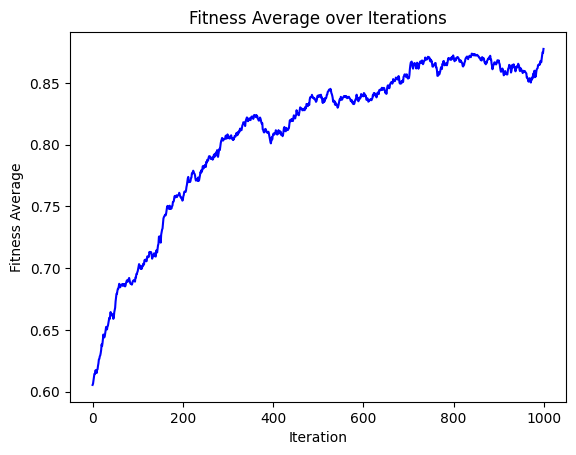

In [35]:
#调用函数进行遗传算法,初始化种群在函数定义块中运行一次，distance矩阵计算一次，剩余的选择，重组，变异需要循环迭代多次
#遗传算法迭代次数
population_size=200
population=init_population(population_size)
Loop_time=10000
fitness_aver_list=[]
for i in range(Loop_time):  
    fitness=fitness_all(population)
    population=select_func(fitness)
    population=crossover(population,c_rate=0.02,num_node=3)
    population=mutation(population,m_rate=0.01)
    #计算本次的平均适应度函数并描点
    fitness_aver=fitness_average()
    print("第",i,"次迭代：",fitness_aver)
    fitness_aver_list.append(fitness_aver)  # 将平均适应度添加到列表中
    
# 一次性绘制数据曲线
plt.plot(range(Loop_time), fitness_aver_list, 'b-')
plt.xlabel('Iteration')
plt.ylabel('Fitness Average')
plt.title('Fitness Average over Iterations')
plt.show()

In [ ]:
population_size=200
population=init_population(population_size)
#初始化种群后多次运行，可以更改参数

第 0 次迭代： 0.6092788715195522
第 1 次迭代： 0.6084613573963478
第 2 次迭代： 0.6119203561823755
第 3 次迭代： 0.6185093506731549
第 4 次迭代： 0.6193159677824319
第 5 次迭代： 0.6200734493130541
第 6 次迭代： 0.6232049293904219
第 7 次迭代： 0.6227003255889514
第 8 次迭代： 0.6223106751896652
第 9 次迭代： 0.6198624006663579
第 10 次迭代： 0.6235320255297678
第 11 次迭代： 0.6224332361989469
第 12 次迭代： 0.6253425196926998
第 13 次迭代： 0.6263053745974783
第 14 次迭代： 0.6307505411128684
第 15 次迭代： 0.633195482800934
第 16 次迭代： 0.6353432443815228
第 17 次迭代： 0.6388895211388033
第 18 次迭代： 0.6432377149618695
第 19 次迭代： 0.6459357614405147
第 20 次迭代： 0.6480316594502332
第 21 次迭代： 0.6469293723098155
第 22 次迭代： 0.6519737317267053
第 23 次迭代： 0.6524295034280415
第 24 次迭代： 0.6602932968837675
第 25 次迭代： 0.6647895542183179
第 26 次迭代： 0.6655604973402199
第 27 次迭代： 0.6677383653415542
第 28 次迭代： 0.6678493393646271
第 29 次迭代： 0.6730209320700508
第 30 次迭代： 0.6734073107561565
第 31 次迭代： 0.6792581192351471
第 32 次迭代： 0.6815933860300385
第 33 次迭代： 0.6815549363737587
第 34 次迭代： 0.6802870635568

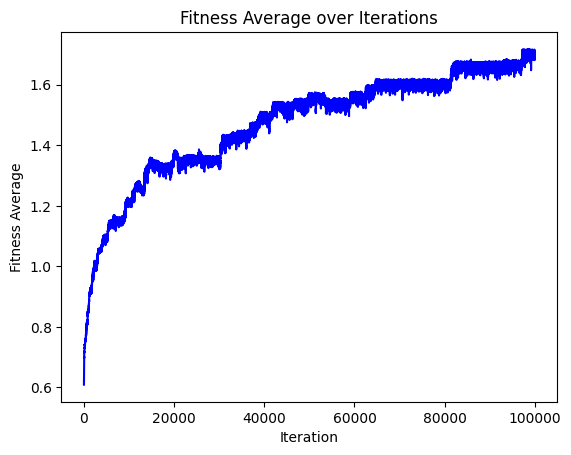

In [43]:
#调用函数进行遗传算法,初始化种群在函数定义块中运行一次，distance矩阵计算一次，剩余的选择，重组，变异需要循环迭代多次
#遗传算法迭代次数

Loop_time=100000
fitness_aver_list=[]
for i in range(Loop_time):  
    fitness=fitness_all(population)
    population=select_func(fitness)
    population=crossover(population,c_rate=0.02,num_node=3)
    population=mutation(population,m_rate=0.01)
    #计算本次的平均适应度函数并描点
    fitness_aver=fitness_average()
    print("第",i,"次迭代：",fitness_aver)
    fitness_aver_list.append(fitness_aver)  # 将平均适应度添加到列表中
    
# 一次性绘制数据曲线
plt.plot(range(Loop_time), fitness_aver_list, 'b-')
plt.xlabel('Iteration')
plt.ylabel('Fitness Average')
plt.title('Fitness Average over Iterations')
plt.show()

In [57]:
Loop_time=10000
for i in range(Loop_time):  
    fitness=fitness_all(population)
    population=select_func(fitness)
    population=crossover(population,c_rate=0.01,num_node=1)
    population=mutation(population,m_rate=0.01)
    #计算本次的平均适应度函数并描点
    fitness_aver=fitness_average()
    print("第",i,"次迭代：",fitness_aver)
    fitness_aver_list.append(fitness_aver)  # 将平均适应度添加到列表中
    


第 0 次迭代： 1.756982114567675
第 1 次迭代： 1.77680338022714
第 2 次迭代： 1.7927127993680736
第 3 次迭代： 1.7956982265969563
第 4 次迭代： 1.7993890528685623
第 5 次迭代： 1.8013675337561101
第 6 次迭代： 1.7990734699768385
第 7 次迭代： 1.8012192366176825
第 8 次迭代： 1.7957846155826727
第 9 次迭代： 1.7887821823014796
第 10 次迭代： 1.7816620291418146
第 11 次迭代： 1.7839809305722916
第 12 次迭代： 1.7860779462015224
第 13 次迭代： 1.788997126802544
第 14 次迭代： 1.7879428764983647
第 15 次迭代： 1.780650443889785
第 16 次迭代： 1.780657445457679
第 17 次迭代： 1.7854716348231212
第 18 次迭代： 1.7960099812859451
第 19 次迭代： 1.797401985890934
第 20 次迭代： 1.8035835890225653
第 21 次迭代： 1.7958547057266767
第 22 次迭代： 1.7887319202501593
第 23 次迭代： 1.7922666312983313
第 24 次迭代： 1.7970259974293037
第 25 次迭代： 1.7813773658616219
第 26 次迭代： 1.793661180342142
第 27 次迭代： 1.7919353630847867
第 28 次迭代： 1.7984586429064071
第 29 次迭代： 1.7973536827170502
第 30 次迭代： 1.798050679310614
第 31 次迭代： 1.7968063807332444
第 32 次迭代： 1.805483396452459
第 33 次迭代： 1.8102907505483556
第 34 次迭代： 1.8159328467755183
第 35 

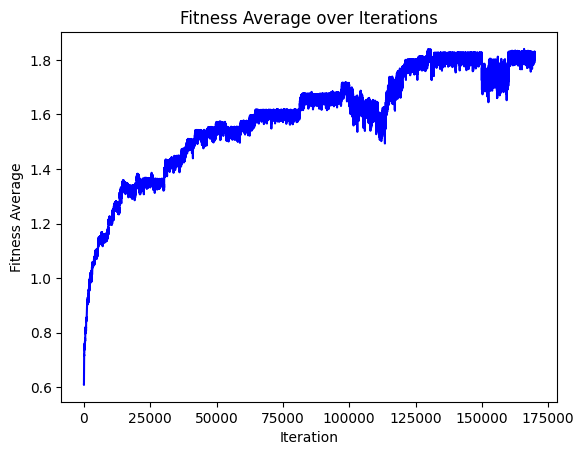

In [58]:
# 一次性绘制数据曲线
plt.plot(range(170000), fitness_aver_list, 'b-')
plt.xlabel('Iteration')
plt.ylabel('Fitness Average')
plt.title('Fitness Average over Iterations')
plt.show()

In [62]:
#计算最终种群中每个个体的适应度，从中挑选出最优个体
fitness=fitness_all(population)
best_index = np.argmax(fitness)
min_distance=1000/fitness[best_index]
best_individual = population[best_index]
print(min_distance)
best_individual

545.1417783540622


[14,
 36,
 16,
 11,
 50,
 45,
 26,
 21,
 19,
 34,
 35,
 2,
 27,
 30,
 25,
 7,
 0,
 31,
 10,
 4,
 46,
 3,
 40,
 39,
 18,
 41,
 43,
 44,
 32,
 9,
 38,
 48,
 37,
 22,
 6,
 42,
 23,
 13,
 24,
 12,
 17,
 5,
 47,
 1,
 28,
 20,
 15,
 49,
 8,
 33,
 29]

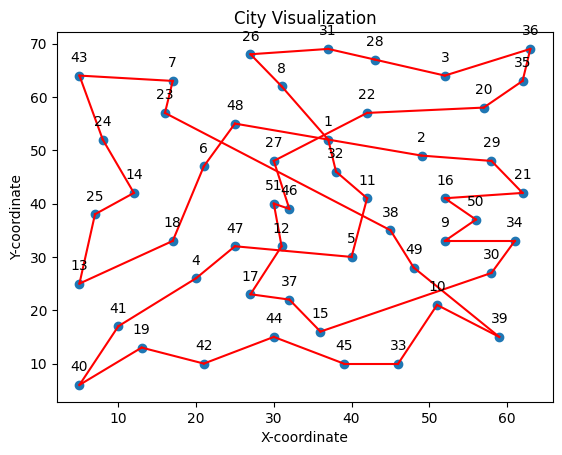

In [63]:
x = [city[1] for city in cities]
y = [city[2] for city in cities]

# 绘制散点图
plt.scatter(x, y)

# 添加城市编号标签
for city in cities:
    plt.annotate(city[0], (city[1], city[2]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制连线
for i in range(len(best_individual)-1):
    city1 = best_individual[i]
    city2 = best_individual[i+1]
    x1, y1 = cities[city1][1], cities[city1][2]
    x2, y2 = cities[city2][1], cities[city2][2]
    plt.plot([x1, x2], [y1, y2], 'r-')

# 连接首尾城市
city1 = best_individual[-1]
city2 = best_individual[0]
x1, y1 = cities[city1][1], cities[city1][2]
x2, y2 = cities[city2][1], cities[city2][2]
plt.plot([x1, x2], [y1, y2], 'r-')

# 设置图形标题和坐标轴标签
plt.title("City Visualization")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")

# 显示图形
plt.show()